### Question: How do the optimum sample sizes $M_z, N_z$ vary across books & authors?

The intuitive definition of "optimum" would seem to imply there is a "strange attractor" at some point in the English (or whatever) language at which any sample corpus of _exactly_ that size exhibits a perfect Zipf distribution. Any corpus of any other size, when sampled, should yield a type-token growth curve parametrizable by this choice of $M_z, N_z$ or something close to it. Taking lots of books (by the same author, then fanning out to multiple authors within the same language) should reveal this strange attractor, a mysterious point in the type-token phase space, around which most fitted models cluster, diffusing slowly.

This is a fantasy, of course. There is no single "point" in phase space, and the optimizing parameters vary quite a lot author-to-author, and even book-to-book. However, the empirical values of $M_z, N_z$ are much more localized than the "raw" token/type counts $M, N$. This does lend credence to the idea of the existence of an "optimum sample" or a "closure of speech" as Zipf called it. Let's attempt to map out that region.

In [1]:
# bloody dependencies
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd

# custom classes
from legomena import Corpus, SPGC, LogModel

In [2]:
# standard project gutenberg corpus
spgc = SPGC.getMeta()

# for now, restrict study to english-only
spgc = spgc[spgc.language == "['en']"]

# preview
spgc.head()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
5,The United States Constitution,United States,NaN,NaN,['en'],226.0,"{'United States. Constitution', 'United States...",Text


In [3]:
# most prolific authors
spgc.groupby(["author"]).size().sort_values().to_frame().tail(25)

,0
author,
"James, Henry",78
"Baum, L. Frank (Lyman Frank)",78
"Trollope, Anthony",81
"Dickens, Charles",84
"Stevenson, Robert Louis",86
"Pepys, Samuel",87
"Hawthorne, Nathaniel",96
"Ballantyne, R. M. (Robert Michael)",97
"Alger, Horatio, Jr.",101


In [4]:
# all melville's work
melville = spgc[spgc.author == "Melville, Herman"]
melville.sort_values("downloads").tail()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
2489,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],324.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
21816,The Confidence-Man: His Masquerade,"Melville, Herman",1819.0,1891.0,['en'],518.0,"{'Satire', 'Swindlers and swindling -- Fiction...",Text
11231,"Bartleby, the Scrivener: A Story of Wall-Street","Melville, Herman",1819.0,1891.0,['en'],740.0,"{'Young men -- Fiction', 'Copyists -- Fiction'...",Text
15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],905.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
2701,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],14337.0,"{'Whaling ships -- Fiction', 'Mentally ill -- ...",Text


In [5]:
# moby dick
mobydick = SPGC.get(2701)

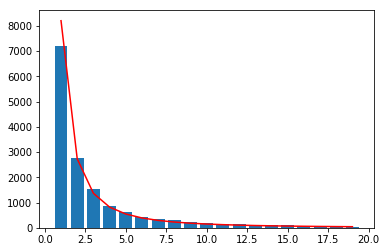

In [8]:
# k-legomena distributions
x = np.arange(1, 20)
plt.bar(x, mobydick.k[x])
plt.plot(x, mobydick.N/x/(x+1), color="r")
plt.show()

In [14]:
# load all melville into memory
mem = {}
for pgid in melville.index.values:
    corpus = SPGC.get(pgid)
    TTR = corpus.TTR
    model = LogModel().fit(TTR.m_tokens, TTR.n_types)
    mem[pgid] = (corpus, model)

In [15]:
# tabulate (M,N,k1) for all of melville
df = [ (pgid, corpus.M, corpus.N, model.M_z, model.N_z, corpus.k[1]) for pgid, (corpus, model) in mem.items() ]
df = pd.DataFrame(df, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
df = df.set_index("id")
df

,tokens,types,M_z,N_z,hapaxes
id,,,,,
15,1352,595,45451,5527,448
1900,113161,10382,57015,7534,4518
2489,210370,16570,112485,12343,7278
2694,11276,2606,63423,6959,1686
2701,210258,16402,114022,12291,7197
4045,101290,10415,76425,9104,4767
8118,117072,10973,98988,10137,5152
10712,135918,12873,95679,10887,5856
11231,14293,2923,53219,6048,1782


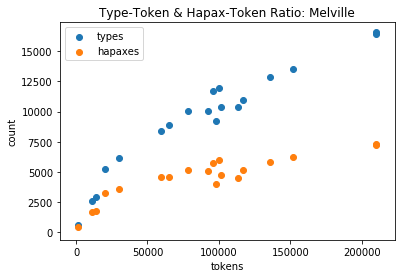

In [16]:
# draw a pretty picture
plt.scatter(df.tokens, df.types, label = "types")
plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
plt.title("Type-Token & Hapax-Token Ratio: Melville")
plt.xlabel("tokens")
plt.ylabel("count")
plt.legend()
plt.show()

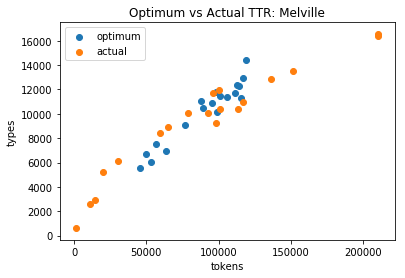

In [17]:
# optimum vs actual
plt.scatter(df.M_z, df.N_z, label = "optimum")
plt.scatter(df.tokens, df.types, label = "actual")
plt.title("Optimum vs Actual TTR: Melville")
plt.xlabel("tokens")
plt.ylabel("types")
plt.legend()
plt.show()

In [22]:
# now a more complete study
authors = ["Zola, Émile", "Stevenson, Robert Louis", "Hawthorne, Nathaniel", "Dickens, Charles", "Dumas, Alexandre", "Verne, Jules", "Twain, Mark", "Shakespeare, William"]
for author in authors:
    print("Working on", author)
    
    # all author's works
    books = spgc[spgc.author == author]
    
    # build & fit each corpus
    for pgid in books.index.values:
        try:
            corpus = SPGC.get(pgid)
            TTR = corpus.TTR
            model = LogModel().fit(TTR.m_tokens, TTR.n_types)
            mem[pgid] = (corpus, model)
        except:
            continue

Working on Zola, Émile


/home/victor/Documents/GitHub/legomena/legomena.py:339: RuntimeWarning: invalid value encountered in log
  func = lambda m, M_z, N_z: N_z * np.log(m / M_z) * m / M_z / (m / M_z - 1)


Working on Stevenson, Robert Louis
"There is no item named 'SPGC-counts-2018-07-18/PG43_counts.txt' in the archive"
[Errno 2] No such file or directory: '/home/victor/Documents/GitHub/legomena/data/SPGC-counts-2018-07-18/PG43_counts.txt'
Working on Hawthorne, Nathaniel
"There is no item named 'SPGC-counts-2018-07-18/PG9232_counts.txt' in the archive"
[Errno 2] No such file or directory: '/home/victor/Documents/GitHub/legomena/data/SPGC-counts-2018-07-18/PG9232_counts.txt'
"There is no item named 'SPGC-counts-2018-07-18/PG9255_counts.txt' in the archive"
[Errno 2] No such file or directory: '/home/victor/Documents/GitHub/legomena/data/SPGC-counts-2018-07-18/PG9255_counts.txt'
Working on Dickens, Charles
"There is no item named 'SPGC-counts-2018-07-18/PG46_counts.txt' in the archive"
[Errno 2] No such file or directory: '/home/victor/Documents/GitHub/legomena/data/SPGC-counts-2018-07-18/PG46_counts.txt'
"There is no item named 'SPGC-counts-2018-07-18/PG98_counts.txt' in the archive"
[Err

In [23]:
# tabulate (M,N,M_z,N_z,k1) for all author's works
book_data = [ (pgid, corpus.M, corpus.N, model.M_z, model.N_z, corpus.k[1]) for pgid, (corpus, model) in mem.items() ]
book_data = pd.DataFrame(book_data, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
book_data = book_data.set_index("id")
book_data["author"] = spgc["author"]
book_data.head()

,tokens,types,M_z,N_z,hapaxes,author
id,,,,,,
15,1352,595,45451,5527,448,"Melville, Herman"
1900,113161,10382,57015,7534,4518,"Melville, Herman"
2489,210370,16570,112485,12343,7278,"Melville, Herman"
2694,11276,2606,63423,6959,1686,"Melville, Herman"
2701,210258,16402,114022,12291,7197,"Melville, Herman"


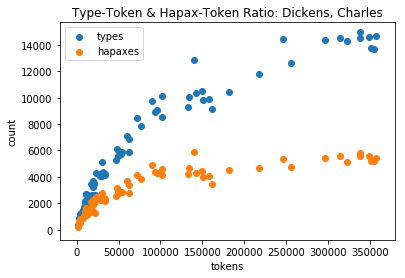

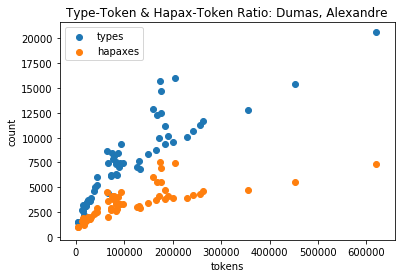

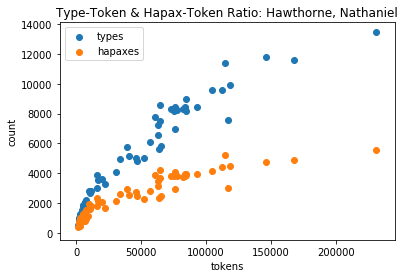

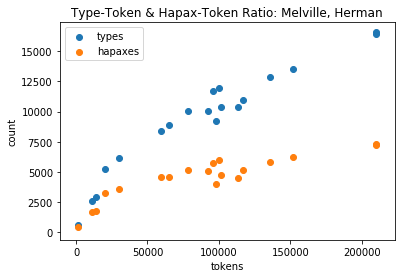

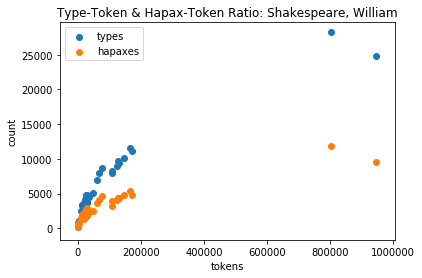

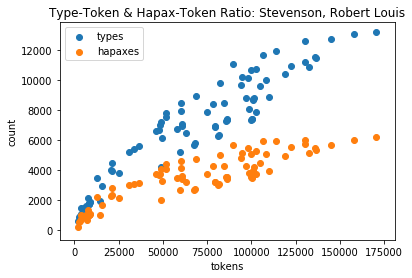

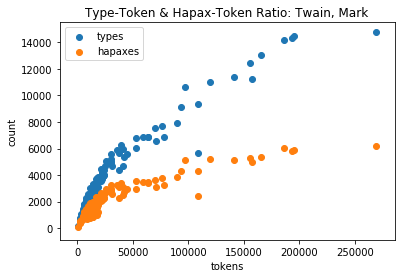

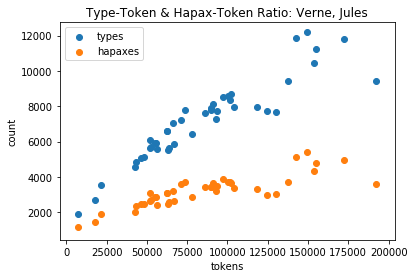

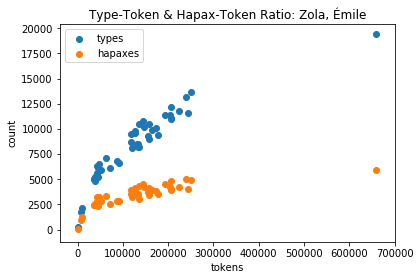

In [24]:
# TTR by author
for author, df in book_data.groupby(["author"]):
    plt.scatter(df.tokens, df.types, label = "types")
    plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
    plt.title(f"Type-Token & Hapax-Token Ratio: {author}")
    plt.xlabel("tokens")
    plt.ylabel("count")
    plt.legend()
    plt.show()

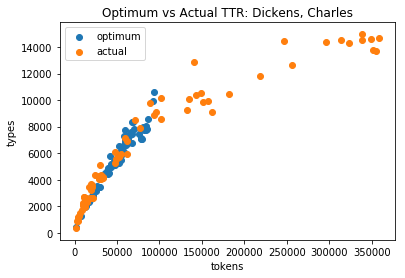

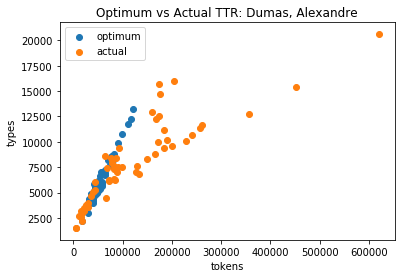

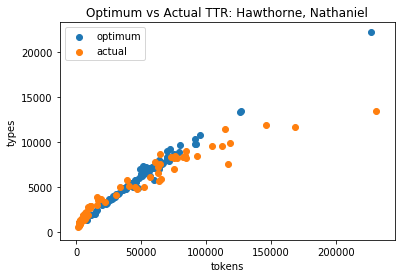

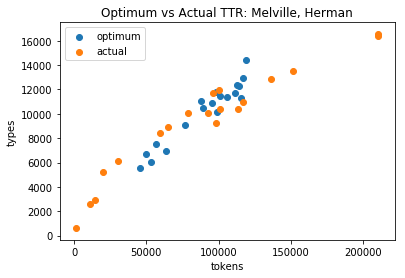

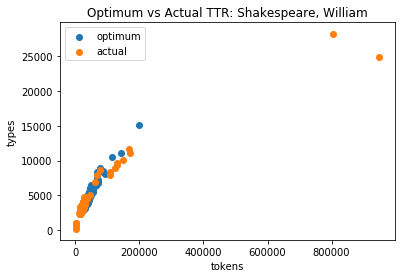

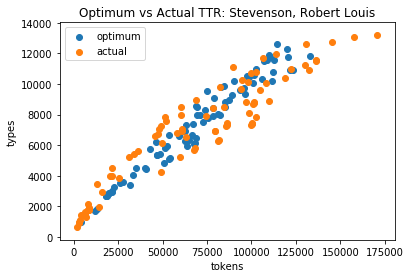

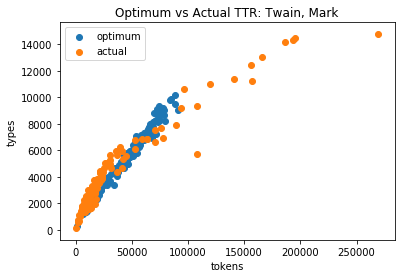

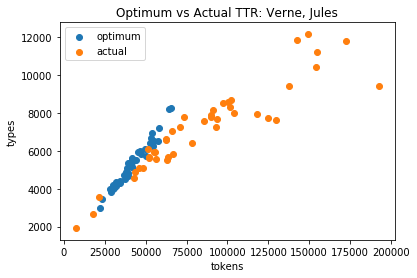

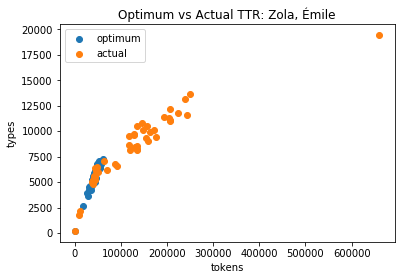

In [29]:
# optimum vs actual per author
for author, df in book_data.groupby(["author"]):
    plt.scatter(df.M_z, df.N_z, label = "optimum")
    plt.scatter(df.tokens, df.types, label = "actual")
    plt.title(f"Optimum vs Actual TTR: {author}")
    plt.xlabel("tokens")
    plt.ylabel("types")
    plt.legend()
    plt.show()

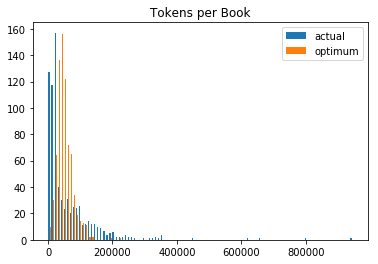

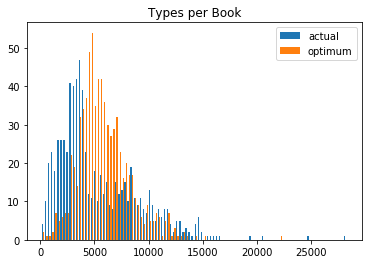

In [30]:
# words per book
plt.hist([book_data.tokens, book_data.M_z], label = ["actual", "optimum"], bins = 100)
plt.title("Tokens per Book")
plt.legend()
plt.show()

# unique words per book
plt.hist([book_data.types, book_data.N_z], label = ["actual", "optimum"], bins = 100)
plt.title("Types per Book")
plt.legend()
plt.show()